<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/13%20-%20Numpy%20Broadcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 13/30 Numpy et Broadcasting (extension de matrice)

In [1]:
import numpy as np

#### Broacaster une matrice = étendre sa dimension pour réaliser des opération avec une autre matrice - ici A.shape=(n, m) et B.shape=(n', m')
#### mais cela peut se faire sous conditions uniquement !
#### 1 - (n, m)=(n', m') <=> A.shape = B.shape       ou bien
#### 2 - (n, m) et (1, m) ou (n, m) et (n, 1)
#### 3 - (n, 1 ) et (1, m) cela étend les 2 tableaux

In [2]:
A = np.ones((2, 3))  # A.shape=(2, 3) matrice de 1 partout
B = 3   # B.shape=(1, 1)
print(A+B,'\n') # on peut donc broadcaster A+B
 
A = np.ones((2, 3))
C = np.ones((2, 1)) # C a une colonne, elle sera étendu sur les trois colonnes de A
print(A+C,'\n') # on peut donc broadcaster A+C car il y a une dim=1 dans C
 
A = np.ones((3, 4))
B = np.array([1, 4, 7, 9])  # B.shape=(1, 4)
print(A+B,'\n')

A = np.ones((4, 3))  # A.shape = (4, 3)
B = np.array([[1], [2], [3], [4]])  # B.shape=(4, 1)
print(A+B,'\n')

[[4. 4. 4.]
 [4. 4. 4.]] 

[[2. 2. 2.]
 [2. 2. 2.]] 

[[ 2.  5.  8. 10.]
 [ 2.  5.  8. 10.]
 [ 2.  5.  8. 10.]] 

[[2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]
 [5. 5. 5.]] 



In [3]:
A = np.ones((3, 1))
B = np.ones((1, 4))
print(A+B)   # extension à un tableau 4x4

[[2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]


#### attention au piège si A.shape = (n, )  => il faut faire un reshape de A => (n, 1)

In [4]:
A = np.ones((1,3))
B = np.ones((4, ))   # numpy considère que 4 est la derniere dim de B d'où 1 ligne et 4 colonnes
print("A=", A,'\n',"B=", B,'\n')

A= [[1. 1. 1.]] 
 B= [1. 1. 1. 1.] 



In [5]:
## Les calculs A+B peuvent alors être erroné sans s'en apercevoir, il faut donc absolument 
## toujours vérifier les shapes des tableau et faire un reshape si on voit une dim absente

In [5]:
print(A.shape)
print(B.shape)   # on voit le pb sur B


(1, 3)
(4,)


In [6]:
B = B.reshape((4, 1))   # ici facile pour 4 mais normalement faire B.shape[0] au lieur de 4
B.shape
print("BxA=", B.dot(A))  # possible maintenant

BxA= [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [7]:
## exemple de bug en ML possible ( extrait 8/10 ML guillaume )

x.shape = (20, 1) y.shape = (20,)


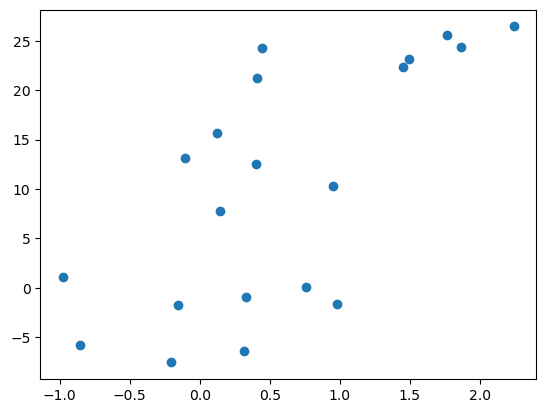

In [8]:
import numpy as np
from sklearn.datasets import make_regression    
import matplotlib.pyplot as plt

np.random.seed(0)
x, y = make_regression(n_samples=20, n_features=1, noise=10)
plt.scatter(x, y)
print("x.shape =", x.shape, "y.shape =", y.shape)   # on voit le pb sur y.shape = (100,)

In [9]:
print("x = ", x,'\n', "y = ", y)  # x à 20 lignes et 1 colonne, y a 1 ligne et 20 colonnes

x =  [[-0.15135721]
 [ 0.40015721]
 [ 0.97873798]
 [-0.85409574]
 [-0.97727788]
 [ 0.3130677 ]
 [-0.10321885]
 [-0.20515826]
 [ 0.33367433]
 [ 1.49407907]
 [ 0.95008842]
 [ 0.12167502]
 [ 1.45427351]
 [ 1.86755799]
 [ 0.14404357]
 [ 0.4105985 ]
 [ 0.76103773]
 [ 2.2408932 ]
 [ 0.44386323]
 [ 1.76405235]] 
 y =  [-1.69610717 12.54205757 -1.60443615 -5.84638325  1.13431316 -6.37007753
 13.1477283  -7.56606655 -0.91184146 23.17198001 10.28925578 15.69897406
 22.34013972 24.35056259  7.72931233 21.2363558   0.12694595 26.45696448
 24.23776581 25.62265958]


### on devrait pouvoir faire x - y avec un broadcasting automatique mais ça ne marche pas

In [10]:
print(x-y)  # -> donne un énorme tableau 20x20 au lieu de 20x1

[[ 1.54474996e+00 -1.26934148e+01  1.45307894e+00  5.69502604e+00
  -1.28567037e+00  6.21872033e+00 -1.32990855e+01  7.41470934e+00
   7.60484255e-01 -2.33233372e+01 -1.04406130e+01 -1.58503313e+01
  -2.24914969e+01 -2.45019198e+01 -7.88066953e+00 -2.13877130e+01
  -2.78303157e-01 -2.66083217e+01 -2.43891230e+01 -2.57740168e+01]
 [ 2.09626437e+00 -1.21419004e+01  2.00459336e+00  6.24654046e+00
  -7.34155950e-01  6.77023474e+00 -1.27475711e+01  7.96622376e+00
   1.31199867e+00 -2.27718228e+01 -9.88909858e+00 -1.52988169e+01
  -2.19399825e+01 -2.39504054e+01 -7.32915512e+00 -2.08361986e+01
   2.73211260e-01 -2.60568073e+01 -2.38376086e+01 -2.52225024e+01]
 [ 2.67484515e+00 -1.15633196e+01  2.58317413e+00  6.82512123e+00
  -1.55575174e-01  7.34881552e+00 -1.21689903e+01  8.54480453e+00
   1.89057945e+00 -2.21932420e+01 -9.31051780e+00 -1.47202361e+01
  -2.13614017e+01 -2.33718246e+01 -6.75057434e+00 -2.02576178e+01
   8.51792036e-01 -2.54782265e+01 -2.32590278e+01 -2.46439216e+01]
 [ 8.42

### il fallait faire un reshape sur y

In [11]:
y = y.reshape((y.shape[0], 1))  # importance du y = y... pour réaffecter le reshape à y sinon pb
y.shape  # -> (20, 1)

(20, 1)

In [12]:
print(x-y)

[[  1.54474996]
 [-12.14190037]
 [  2.58317413]
 [  4.99228751]
 [ -2.11159104]
 [  6.68314524]
 [-13.25094715]
 [  7.36090829]
 [  1.24551579]
 [-21.67790093]
 [ -9.33916737]
 [-15.57729905]
 [-20.88586621]
 [-22.4830046 ]
 [ -7.58526875]
 [-20.8257573 ]
 [  0.63409178]
 [-24.21607128]
 [-23.79390258]
 [-23.85860723]]
